### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
#импортируем библиотеки, проверяем формат данных и NaN/Null в колонках.
import matplotlib.pyplot as plt # перенс импорт библиотеки сюда из середины кода
import numpy as np
import pandas as pd
from statistics import mode
from IPython.display import display
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') #данные разделены табуляцией
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [2]:
display(data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


#### Выведу по нескольку гистограмм, возможно "выборосы" сразу бросятся в глаза.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff799bb4fd0>,
      dtype=object)

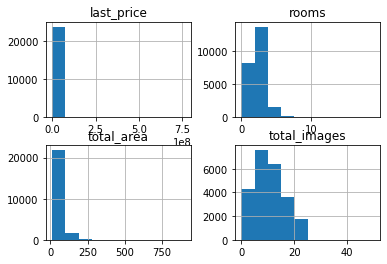

In [3]:
data.loc[:,'total_images':'rooms'].hist(bins=10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff797b12bd0>,
      dtype=object)

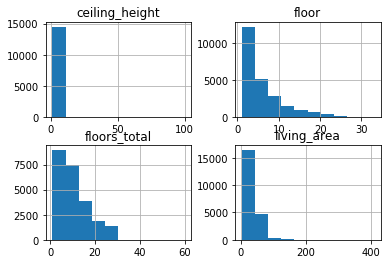

In [4]:
data.loc[:,'ceiling_height':'floor'].hist(bins=10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff7972b5410>,
      dtype=object)

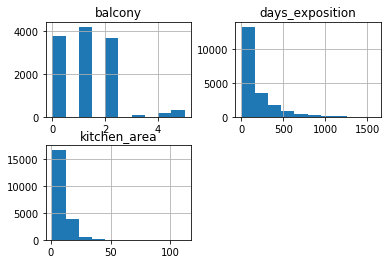

In [5]:
data.loc[:,['kitchen_area','balcony', 'days_exposition']].hist(bins=10)

#### Вывод

Данные были записаны в таблицу в один столбец и разделены табуляцией:
1. 23699 строк всего и 22 колонки данных, но некоторые данные нелогичным образом пропущены или не соответсвуют своему типу;
2. Заметил, что максимальная высота потолка в некоторых объявлениях под 100, видимо метров. Аналогично можно заметить наличие квартир с 10ю и более комнатами, общей площадью под 750 метров и кухнями по 100 метров - нужно будет оценить как много таких объявлений и насколько они способны повлиять на средние значения.
---
- высота потолка не везде указана, хотя потолок есть обычно у всех домов/квартир; 
- не везде указана жилая площадь - или это не жилые здания, буду проверять;
- маркер `is_appartment` должно быть задумывался как булевая величина, но там 90% информации пропущено и в формате object, почему-то;
- наличие балкона также указано не везде, а если указано, то почему-то в виде `float`, а не `int`;
- также в 49 случаях пропущено название города (самого важного фактора в цене квартир!), что по сути не оставляет шансов этим строкам - их вероятно придется удалить.
---
1. Начну с удаления дубликатов;
1. Потом приступлю к отделению от общего массива "вбросов", поскольку иначе они исказят наши усреднения;
1. Полагаю, что названия локаций указаны везде по-разному и кто-то пишет например: С.Петербург, а кто-то Санкт-Петербург. Лемматизирую такие данные и приведу к единообразию.
1. Затем заменю тип данных на нужный согласно здравому смыслу;
1. Важные колонки с пропущенными данными видимо придется заполнять средним - например средняя жилая площадь для такого количества комнат и т.п.

### Шаг 2. Предобработка данных

In [6]:
data.drop_duplicates() # дубликатов на этом этапе предобработки данных нет

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


#### Пройдемся по некоторым столбцам и определим диапазон разумных значений и возможных "вбросов", некоторые из которых мы можем учесть в `query`.
- total_images - сейчас начинаются от 0 фото - ну главное нет отрицательных значений, остальное все логично;
- last_price - также нет отрицательных, уже хорошо. Дальше оценим детальнее сколько "сверх-дорогих" квартир;
- total_area - от 0 до 750, заметил на гистрограмме, что большинство квартир все-таки площадью до 200-250 метров. Сделаем этот диапазон 0-200 метров зоной отсечения, а все остальное будем считать вбросами.
- rooms - есть квартиры и с 19ю комнатами, но нас интересуют только большинство - возьмем те где 1-6 комнат, остальные отсекаем.
- ceiling_height - нужно разумно смотреть на массовый рынок, все квартиры с высотой потолка выше 4х метров отсекаем. А те значения которые пропущены будем заполнять средним значением для количества комнат в квартире.
- floors_total - не удивлюсь если у большинства квартир 5 или 10 этажей, но и высотки тоже оставляем. Здесь оставляем все.
- living_area - все что больше 200 метров отсекаем.
- days_exposition - все что по 1000 дней и т.п. конечно удалим.
- остальные колонки полагаем, что так или иначе будут очищены от вбросов, если мы почистим колонки указанные выше.

Так мы сможем посчитать корректные средние значения и заменить пропуски.

In [7]:
#посчитаю количество предложений в зависимости от этажей в доме
data.groupby('floors_total')['floors_total'].count()

floors_total
1.0       25
2.0      383
3.0      668
4.0     1200
5.0     5788
6.0      914
7.0      592
8.0      390
9.0     3761
10.0    1174
11.0     203
12.0    1362
13.0     229
14.0     553
15.0     365
16.0    1376
17.0     833
18.0     505
19.0     339
20.0     271
21.0     158
22.0     286
23.0     352
24.0     469
25.0    1075
26.0     124
27.0     164
28.0      21
29.0       1
33.0       1
34.0       1
35.0      24
36.0       3
37.0       1
52.0       1
60.0       1
Name: floors_total, dtype: int64

In [8]:
data_filtered = data.query('total_area <= 200 and rooms <= 6').reset_index() 
# остальные факторы не учитываю пока что, поскольку удалятся пропуски, а нам нужно их заполнить
len(data_filtered)

23448

In [9]:
print("Таким образом убрали {:.2%} строк".format((len(data)-len(data_filtered))/len(data)))

Таким образом убрали 1.06% строк


#### Заполняю пропуски в `ceiling_height`

In [10]:
# data_filtered['ceiling_height'].describe()

In [11]:
#высчитываем медиану чтобы, использовать вместо NaN в колонке `ceiling_height`
data_filtered_median_cel_height = data_filtered.pivot_table(index='rooms',values='ceiling_height',aggfunc='median')
#заменяем индексы на количества комнат в срезе основного df, а затем ресетим, чтобы подтянуть медиану в основной df
data_filtered_new_index = data_filtered.loc[:,['rooms','ceiling_height']] #делаем срез основного, чтобы основной не испортить
data_filtered_new_index.set_index('rooms', inplace=True)
data_filtered_new_index['median_cel_height'] = data_filtered_median_cel_height['ceiling_height']
data_filtered_new_index.reset_index(drop=True, inplace=True)
data_filtered['median_cel_height'] = data_filtered_new_index['median_cel_height']

#замещаем пропуски в высоте потолка на медиану по количеству комнат
data_filtered['ceiling_height'] = data_filtered['ceiling_height'].fillna(data_filtered['median_cel_height'])

In [12]:
len(data_filtered.query('ceiling_height <= 1.5 or ceiling_height > 100'))

2

In [13]:
#убираю экстремальные значения высоты потолков
data_filtered = data_filtered.query('ceiling_height >= 1.5 and ceiling_height < 100')

In [14]:
print("Таким образом убрали {:.2%} строк".format((len(data)-len(data_filtered))/len(data)))

Таким образом убрали 1.07% строк


#### Заполняю пропуски во `floors_total`

In [15]:
data_filtered['floors_total'].isna().sum()

85

In [16]:
#считаю сколько раз не было указано количество этажей всего в доме для определенных этажей
data_filtered_no_floors = data_filtered.query('floors_total.isna()')
data_filtered_no_floors['floor'].value_counts()

4     10
6      8
8      8
12     6
9      5
3      4
21     4
5      4
7      4
11     3
10     3
1      3
13     3
15     3
18     3
19     3
14     2
20     2
2      2
24     2
23     1
17     1
22     1
Name: floor, dtype: int64

Первоначальное решение

In [17]:
#вместо пропуска будет тот этаж на котором расположен объект (квартира)
#data_filtered['floors_total'] = data_filtered['floors_total'].fillna(data_filtered['floor'])

Первоначальная идея заместить количеством этажей всего на фактический этаж оказалось провальной. Понимаю, что это исказит данные продаж последних этажей.
Вторая идея была рассчитать:
- как этажность меняется в зависимости от удаления от центра;
- какова средняя площадь комнат разных типов домов;
- какова доля домов разной высоты;

И на основании этих 3х вводных + фактический этаж присвоить наиболее вероятный этаж, там где он пропущен.
Но из-за 85ти строк столько труда. В реальном проекте у меня наверно не было бы на это время и я решил просто удалить строки где не указана этажность, надеюсь это правильный подход для такого типа вопросов и он меньше искажает данные чем первоначальное решение.

Простое, второе решение

In [18]:
data_filtered = data_filtered[data_filtered['floors_total'].isna() == False]

In [19]:
print("Убрали накопительно {:.2%} строк".format((len(data)-len(data_filtered))/len(data)))

Убрали накопительно 1.43% строк


#### Заполняю пропуски в `living_area` и `kitchen_area` аналогичным способом, что и с высотой потолка
После этого удалю те строки где жилая площадь + площадь кухни больше общей площади. Не известно в чем еще ошиблись при подаче этих объявлений.

In [20]:
 data_filtered.query('(living_area + kitchen_area) > total_area').shape[0]

64

Первоначальное решение брало во внимание только количество комнат я решил если заменить на составной индекс количества комнат и этажность дома (или удаленности от центра) то строк удалится меньше на проверке логичности площади квартир. Однако, если я беру усреднение только по количеству комнат затем уходят 5.13% строк всего, если составной индекс количества комнат и этажность дома ~5.23%, а если количество комнат и удаленность от центра то больше 7%. Поэтому лучше всего оставить простой индекс и усреднить по количеству комнат. 

In [21]:
data_filtered_median_area = data_filtered.pivot_table(index='rooms',values=['living_area','kitchen_area'],aggfunc='median')
data_filtered_new_index = data_filtered.loc[:,['rooms','living_area', 'kitchen_area']]
data_filtered_new_index.set_index('rooms', inplace=True)
data_filtered_new_index['median_liv_ar'] = data_filtered_median_area['living_area']
data_filtered_new_index['median_kit_ar'] = data_filtered_median_area['kitchen_area']
data_filtered_new_index.reset_index(drop=True, inplace=True)
data_filtered['median_liv_ar'] = data_filtered_new_index['median_liv_ar']
data_filtered['median_kit_ar'] = data_filtered_new_index['median_kit_ar']
data_filtered['living_area'] = data_filtered['living_area'].fillna(data_filtered['median_liv_ar'])
data_filtered['kitchen_area'] = data_filtered['kitchen_area'].fillna(data_filtered['median_kit_ar'])
data_filtered = data_filtered.drop(columns = 'index')

In [22]:
#решение с составным индексом - приводит к большей потере данных

#data_filtered_median_area2 = data_filtered.pivot_table(index=['rooms','km_till_city_center'],values=['living_area','kitchen_area'],aggfunc='median')
#data_filtered_new_index2 = data_filtered.loc[:,['rooms', 'km_till_city_center','living_area', 'kitchen_area']]
#data_filtered_new_index2.set_index(['rooms','km_till_city_center'], inplace = True)
#data_filtered_new_index2['median_liv_ar'] = data_filtered_median_area2['living_area']
#data_filtered_new_index2['median_kit_ar'] = data_filtered_median_area2['kitchen_area']
#data_filtered_new_index2.reset_index(drop=True, inplace=True)
#data_filtered['median_liv_ar'] = data_filtered_new_index2['median_liv_ar']
#data_filtered['median_kit_ar'] = data_filtered_new_index2['median_kit_ar']
#data_filtered['living_area'] = data_filtered['living_area'].fillna(data_filtered['median_liv_ar'])
#data_filtered['kitchen_area'] = data_filtered['kitchen_area'].fillna(data_filtered['median_kit_ar'])
#data_filtered = data_filtered.drop(columns = 'index')

In [23]:
data_filtered = data_filtered.query('(living_area + kitchen_area) < total_area')

In [24]:
print("Убрали накопительно {:.2%} строк".format((len(data)-len(data_filtered))/len(data)))

Убрали накопительно 5.13% строк


In [25]:
#data_filtered.query('(living_area + kitchen_area) > total_area')

#### Отбрасываем те строки данных, в которых не указан город - их усреднить/заполнить нельзя

In [26]:
#Хорошо, что строк с пропущенными городами не так уж и много всего-то 49 в отфильтрованной базе
data_filtered = data_filtered[data_filtered['locality_name'].isna() == False]

In [27]:
print("Убрали накопительно {:.2%} строк".format((len(data)-len(data_filtered))/len(data)))

Убрали накопительно 5.32% строк


#### Проверим везде ли у нас одинаково указаны города / населенные пункты

In [28]:
data_filtered['locality_name'].unique() #сдается мне что "посёлок Мурино", "поселок Мурино" и "Мурино" - это один и тот же объект на карте
#видимо все-таки заполняли кто во что горазд, а я ведь только Мурино заметил...

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [29]:
#лемматизировать будем все эти уникальные населенные пункты
#импортируем библиотеки для лемматизации
from pymystem3 import Mystem
from collections import Counter
m = Mystem()
from nltk.stem import SnowballStemmer # и базы для стеминга на всякий случай
russian_stemmer = SnowballStemmer('russian')

In [30]:
#пишем функцию для лемматизации значений колонки `locality_name`
def lem(text):
    lemmatized = []
    lemmatized = ''.join(m.lemmatize(text))
    return(lemmatized)

#применяю функцию написанную выше и сохраняю данные в отдельный новый столбец
data_filtered['locality_name_lematized'] = data_filtered['locality_name'].apply(lem)

#пишем функцию чтобы убрать \n в получившихся названиях
def repl(text):
    result = []
    result = text.replace('\n','')
    return(result)

#применяем функцию чтобы убрать все \n
data_filtered['locality_name_lematized'] = data_filtered['locality_name_lematized'].apply(repl)

Был "посёлок Мурино", стал "поселок муриный" - зато единообразный, но еще осталось просто "муриный" - видимо буду брать только последние слова.

In [31]:
#пишу функцию чтобы выделить только последние слова - т.е. собственно название населенного пункта
def splt(text):
    result =[]
    result = text.split()
    return(result[-1])

data_filtered['locality_name_lematized'] = data_filtered['locality_name_lematized'].apply(splt)

In [32]:
display(data_filtered['locality_name_lematized'].head())

0    санкт-петербург
1              шушар
2    санкт-петербург
3    санкт-петербург
4    санкт-петербург
Name: locality_name_lematized, dtype: object

#### Осталось еще поменять на верные типы данных

In [33]:
#меняем:
#first_day_exposition на date_time, посольку там сейчас object
#floors_total на integer, посольку не бывает дробных этажей
#balcony, days_exposition не меняю на int поскольку там NaN, но на анализ это повлиять не должно 
data_filtered['first_day_exposition'] = pd.to_datetime(data_filtered['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S').dt.round('1D')
data_filtered['floors_total'] = data_filtered['floors_total'].astype('int')

In [34]:
data_filtered.shape

(22438, 26)

In [35]:
data_filtered = data_filtered.drop_duplicates()
data_filtered.shape #дубликатов после лемматизации тоже не оказалось

(22438, 26)

### А вот теперь можно эти данные анализировать
P.S. Надеюсь я ничего не упустил, ну если какой-то населенный пункт необычный всплывет - сгруппирую его в *прочие*

### Шаг 3. Посчитайте и добавьте в таблицу

#### Расчитываю цену квадратного метра

In [36]:
#добавляю новый столбец
data_filtered['price_per_sq_m'] = (data_filtered['last_price'] / data_filtered['total_area']).round(1)

#### Вычисляю и добавляю в таблицу день, месяц и год публикации - каждый в отдельном столбце

In [37]:
data_filtered['day_exposition'] = data_filtered['first_day_exposition'].dt.weekday
data_filtered['month_exposition'] = data_filtered['first_day_exposition'].dt.month
data_filtered['year_exposition'] = data_filtered['first_day_exposition'].dt.year

#data['datetime'].dt.date #дату
#data['datetime'].dt.year #год
#data['datetime'].dt.weekday

#### Вычисляю соотношение жилой к общей площади, а также площади кухни к общей

In [38]:
data_filtered['area_living_total_ratio'] = (data_filtered['living_area'] / data_filtered['total_area']).round(2)
data_filtered['area_kitchen_total_ratio'] = (data_filtered['kitchen_area'] / data_filtered['total_area']).round(2)

#### С помощью короткой функции определяю какой этаж - первый, последний или другой.

In [39]:
def floor_group(row): # функция проверяет этаж и присваивает группу в зависимости от столбцов таблицы
    floor = row['floor']
    floors_total = row['floors_total']
    
    if floor == 1:
        return('1') #первый
    elif floor != 1 and floor != floors_total:
        return('2') #не первый и не последний
    elif floor == floors_total:
        return('3') #последний

In [40]:
data_filtered['floor_group'] = data_filtered.apply(floor_group, axis = 1) #применяю функцию описанную выше
data_filtered['floor_group'] = pd.to_numeric(data_filtered['floor_group'], errors='coerce')

In [41]:
data_filtered['floor_group'].value_counts()

2    16527
3     3141
1     2770
Name: floor_group, dtype: int64

In [42]:
display(data_filtered) # проверяю что получилось в итоге всех моих вычислений

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,median_liv_ar,median_kit_ar,locality_name_lematized,price_per_sq_m,day_exposition,month_exposition,year_exposition,area_living_total_ratio,area_kitchen_total_ratio,floor_group
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,NaN,...,45.0,9.5,санкт-петербург,120370.4,3,3,2019,0.47,0.23,2
1,7,3350000.0,40.40,2018-12-04,1,2.64,11,18.6,1,NaN,...,17.6,9.0,шушар,82920.8,1,12,2018,0.46,0.27,1
2,10,5196000.0,56.00,2015-08-20,2,2.60,5,34.3,4,NaN,...,30.5,8.7,санкт-петербург,92785.7,3,8,2015,0.61,0.15,2
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,45.0,9,NaN,...,45.0,9.5,санкт-петербург,408176.1,4,7,2015,0.28,0.06,2
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,NaN,...,30.5,8.7,санкт-петербург,100000.0,1,6,2018,0.32,0.41,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23441,2,1350000.0,30.00,2017-07-07,1,2.64,5,17.5,4,NaN,...,NaN,NaN,тихвин,45000.0,4,7,2017,0.58,0.20,2
23442,9,4600000.0,62.40,2016-08-05,3,2.60,9,40.0,8,NaN,...,NaN,NaN,петергоф,73717.9,4,8,2016,0.64,0.13,2
23443,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,NaN,...,NaN,NaN,санкт-петербург,72490.8,1,3,2017,0.55,0.10,2
23444,14,3100000.0,59.00,2018-01-15,3,2.65,5,38.0,4,NaN,...,NaN,NaN,тосно,52542.4,0,1,2018,0.64,0.14,2


#### Расчитываю сколько дней объект выставлялся, округленно

In [43]:
data_filtered['days_exposition_round'] = (data_filtered['days_exposition']).round(-2)

#### Расчитываю ровную удаленность от центра в отдельном столбце
Есть зависимость этажности от удаленности от центра, добавлю эти данные в составной индекс - возможно так усредненеие будет точнее.

In [44]:
data_filtered['km_till_city_center'] = (data_filtered['cityCenters_nearest']/1000).round(0) #округляю для ближайшего километра.

#### Оценю также какова зависимость этажности домов от удаления от центра

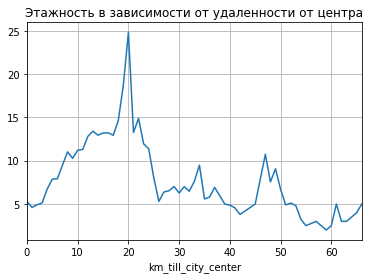

In [45]:
(data_filtered
                #.query('last_price < 15000000 and km_till_city_center <= 10')
                .pivot_table(index='km_till_city_center', values='floors_total', aggfunc='mean')
                .plot(title='Этажность в зависимости от удаленности от центра', legend = False, grid=True)
)

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

#### Построим график "ящик с усами" по 4м параметрам - оценим выборосы

(0, 200)

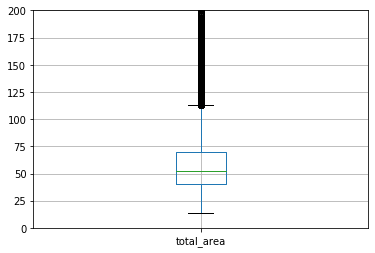

In [47]:
data_filtered.boxplot(column='total_area') # значит правильно я отбросил квартиры с площадью больше 200 метров
plt.ylim(0, 200)

Оценка разброса площади квартир

(-1000000, 15000000)

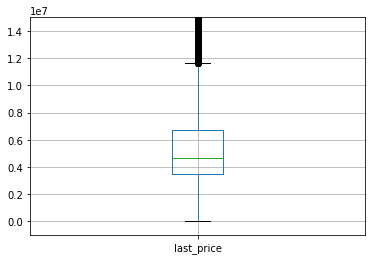

In [48]:
data_filtered.boxplot(column='last_price')
plt.ylim(-1000000, 15000000) #закралось сомнение, что где-то стоит отрицательная цена на квартиры - вроде нет

Оценка разброса цен предложений

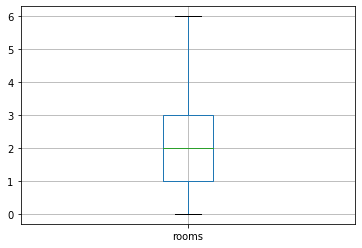

In [49]:
data_filtered.boxplot(column='rooms') #похоже, что я сразу правильно отбросил все квартиры больше чем с 6ю комнатами

Оценка разброса количества комнат

(2.4, 2.87)

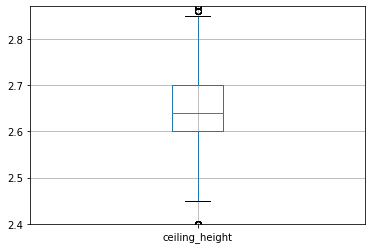

In [50]:
data_filtered.boxplot(column='ceiling_height')
plt.ylim(2.40, 2.87)

Оценка разброса высоты потолков

#### Построим гистаграммы для каждого параметра, где есть нумерические значения и можно построить гистограмму

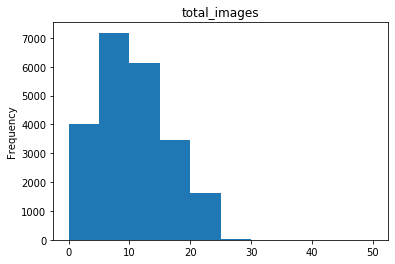

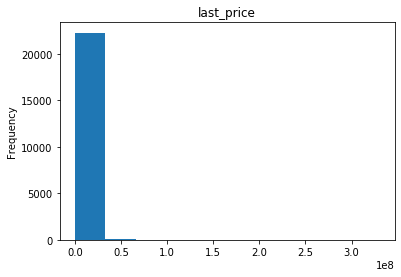

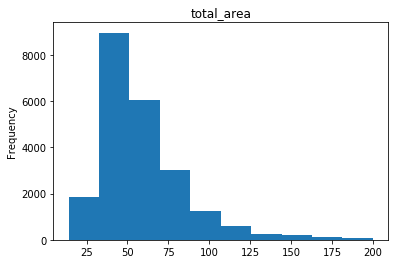

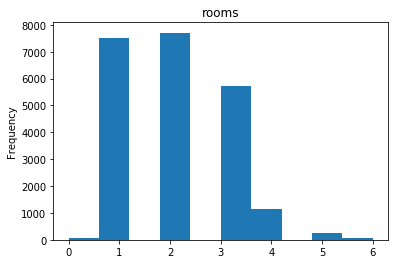

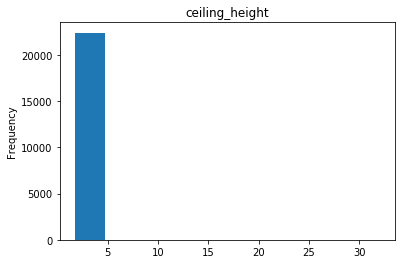

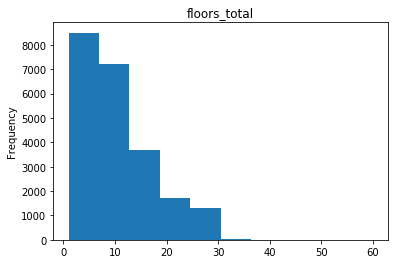

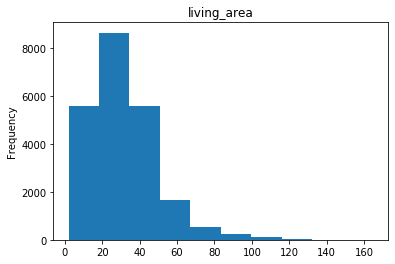

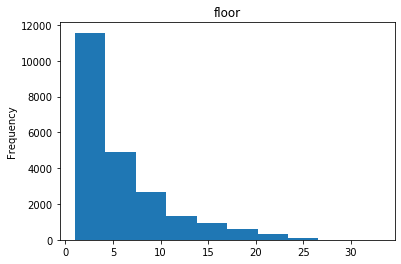

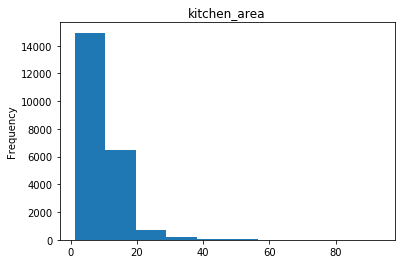

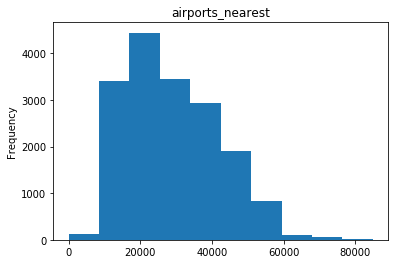

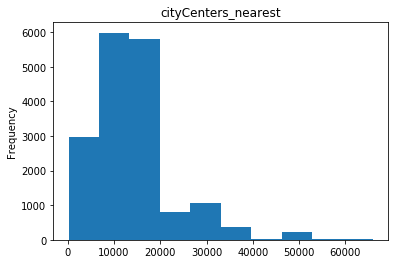

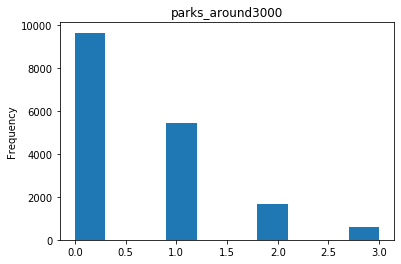

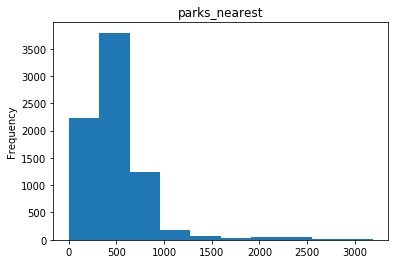

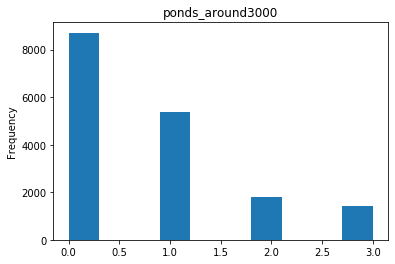

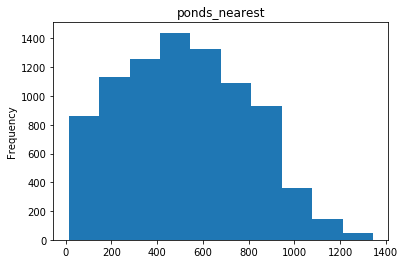

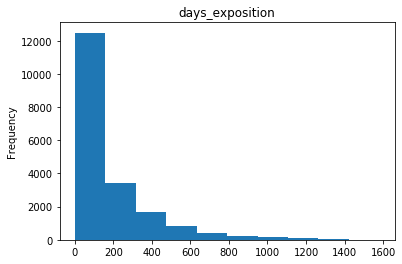

In [51]:
data_filtered_hist = data_filtered.loc[:,['total_images', #передаем только столбцы с нумерическими данными
                                          'last_price',
                                          'total_area',
                                          'rooms',
                                          'ceiling_height',
                                          'floors_total',
                                          'living_area',
                                          'floor',
                                          'kitchen_area',
                                          'airports_nearest',
                                          'cityCenters_nearest',
                                          'parks_around3000',
                                          'parks_nearest',
                                          'ponds_around3000',
                                          'ponds_nearest',
                                          'days_exposition'
                                         ]]

for column in data_filtered_hist.columns:
    data_filtered_hist[column].plot(kind='hist', title=column)
    plt.show()

#### Вывод:
1. Оценка разброса: большинство продающихся объектов все же в пределе 11-110 кв.метров, с ценой до 12 млн, до 6 комнат и потолками от 2,4 до 2,8 метров.
1. Большая часть объектов имеет большое количество объектов в начале и длинный хвост, похоже на распределение Пуассона. Например, совершенно логично большая часть объектов по параметру `days_exposition` выставляется около 100 дней, а затем происходит резкое снижение - видимо за 100 ней большинство объектов либо продаются либо объявления снимают с публикации под другим причинам.
1. Остальные параметры в отфильтрованной таблице также поддаются здравой логике и укладываются в нормальное распределение или распределение Пуассона.

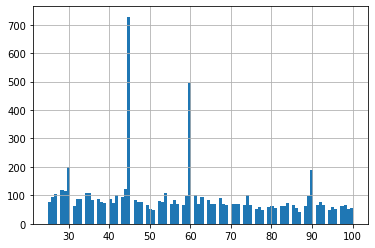

In [52]:
data_filtered.days_exposition.hist(range=(25,100),bins = 100)

На 30й и 45й день происходит первое снижение цены квадратного метра. После существенного снижения цен происходят покупки. А что происходит на 60й и 90й день - это видимо, объявления которые выставили в феврале-апреле и не успели продать до лета (а летом цена снижается). Все опасаются роста цен осенью и начинаются покупки приходящиеся на 60й день и 90й день. Бо'льшая часть объявлений выставляется именно с февраля по апрель.

Ниже код с графиками закомментировал, потому что эти df объявляю дальше, а тут они мне код ломают, но было интересно выяснить почему пики в 30,45, 60 и 90 дней.

In [53]:
#(data_filtered_iteration_2
#                .query('25 < days_exposition < 100')
#                .pivot_table(index='days_exposition', values='price_per_sq_m', aggfunc='mean')
#                .plot(title='Зависимость цены квадратного метра от длительности продажи')
#)

In [54]:
#(data_filtered_iteration_2
#                .query('25 < days_exposition < 100 and month_exposition in (2,3,4)')
#                .pivot_table(index='days_exposition', values='price_per_sq_m', aggfunc='mean')
#                .plot(title='Зависимость цены квадратного метра от длительности продажи в объявлениях выставленных в апреле')
#)

In [55]:
#какое количество объявлений выставляют в разные месяцы
#data_filtered.month_exposition.hist(bins = 12)

### Задание: изучите время продажи квартиры, постройте гистограмму.

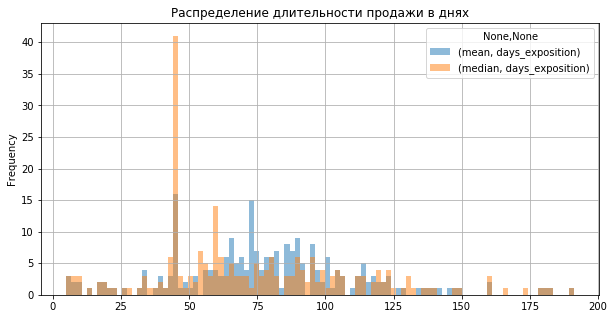

In [56]:
(data_filtered
                .query('0 < days_exposition < 200')
                .pivot_table(index='locality_name_lematized', values='days_exposition', aggfunc=['mean','median'])
                .plot(grid=True, figsize=(10,5), kind='hist', bins=(100), alpha=0.5, title='Распределение длительности продажи в днях')
)

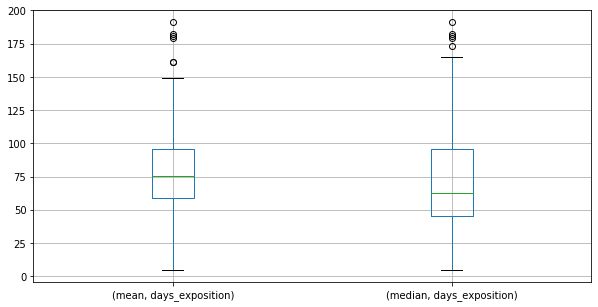

In [57]:
(data_filtered
                .query('0 < days_exposition < 200')
                .pivot_table(index='locality_name_lematized', values='days_exposition', aggfunc=['mean','median'])
                .boxplot(grid=True, figsize=(10,5))
)

Оценим разброс длительности продажи квартир, чтобы выявить редкие значения

In [58]:
(data_filtered
                .query('0 < days_exposition < 200')
                .pivot_table(index='locality_name_lematized', values='days_exposition', aggfunc=['mean','median'])
                .describe()
)

,mean,median
,days_exposition,days_exposition
count,236.000000,236.000000
mean,78.168866,72.572034
std,33.370267,36.962993
min,5.000000,5.000000
25%,58.895833,45.000000
50%,75.669577,62.750000
75%,96.000000,95.625000
max,191.000000,191.000000


#### Вывод: 
продажа обычно занимает от 45 до 94 дней, необычный пик продаж возникает при примерно 45 днях после публикации. Можно сказать, что необычно быстрые продажи - те, кто продались раньше 45 дней. Необычно долгие продажи - те которые дольше 150 дней.

### Задание: уберите редкие и выбивающиеся значения.

In [59]:
#пишу отдельные запросы, чтобы посчитать сколько есть выбивающихся значений, кроме тех, что я отсек в самом начале
#напомню, что тогда я убрал квартиры с площадью более 200 метров и с количеством комнат больше 6ти
#константы для отсечения ниже просто ориентируются на здравый смысл (например высота потолка) и гистограммы выше - там где начинаются длинные хвосты
ceiling_height_non_standard = 4 # константа для отсечения нестандартности высоты потолка
floors_total_non_standard = 60
living_area_non_standard = 200 #проверяю именно 200 метров, потому что вдруг кто-то указал жилую площадь больше общей
last_price_non_standard = 20000000
airports_nearest_non_standard = 60000
cityCenters_nearest_non_standard = 40000
parks_nearest_non_standard = 2500
ponds_nearest_non_standard = 1200
print("Доля объектa(-oв) с нестандартной высотой потолка: {:.5%}".format(len(data_filtered.query('ceiling_height >= @ceiling_height_non_standard'))/len(data_filtered)))
print("Доля объектa(-oв) с нестандартной высотой здания: {:.5%}".format(len(data_filtered.query('floors_total >= @floors_total_non_standard'))/len(data_filtered)))
print("Доля объектa(-oв) с нестандартной жилой площадью: {:.5%}".format(len(data_filtered.query('living_area >= @living_area_non_standard'))/len(data_filtered)))
print("Доля объектa(-oв) с нестандартной ценой: {:.5%}".format(len(data_filtered.query('last_price >= @last_price_non_standard'))/len(data_filtered)))
print("Доля объектa(-oв) на нестандартном удалении от аэропорта: {:.5%}".format(len(data_filtered.query('airports_nearest >= @airports_nearest_non_standard'))/len(data_filtered)))
print("Доля объектa(-oв) на нестандартном удалении от центра: {:.5%}".format(len(data_filtered.query('cityCenters_nearest >= @cityCenters_nearest_non_standard'))/len(data_filtered)))
print("Доля объектa(-oв) нестандратном удалении от парков: {:.5%}".format(len(data_filtered.query('parks_nearest >= @parks_nearest_non_standard'))/len(data_filtered)))
print("Доля объектa(-oв) нестандратном удалении от водоемов: {:.5%}".format(len(data_filtered.query('ponds_nearest >= @ponds_nearest_non_standard'))/len(data_filtered)))


Доля объектa(-oв) с нестандартной высотой потолка: 0.37882%
Доля объектa(-oв) с нестандартной высотой здания: 0.00446%
Доля объектa(-oв) с нестандартной жилой площадью: 0.00000%
Доля объектa(-oв) с нестандартной ценой: 2.32195%
Доля объектa(-oв) на нестандартном удалении от аэропорта: 0.75764%
Доля объектa(-oв) на нестандартном удалении от центра: 1.31473%
Доля объектa(-oв) нестандратном удалении от парков: 0.07131%
Доля объектa(-oв) нестандратном удалении от водоемов: 0.21838%


In [60]:
#удаляю выбивающиеся из констант выше объекты, в которых нет NaN и также не трогаю цены - думаю, что это предложения в городах и на отдельно взятую выборку города эти удаления окажут сильное влияние.
data_filtered_iteration_2 = data_filtered.query('ceiling_height <= 4 and floors_total <= 60')
data_filtered_iteration_2.shape

(22383, 35)

#### Вывод: 
по большей части показателей совершенно нестандартных выбросов откровенно мало и отсечь их можно было бы безболезненно, но во многих колонках есть NaN, и если производить такие отсечения, то строки с незаполненными объектами тоже пропадут, а их весьма много. Ну или делать условно: "отсекай только если число, если NaN - не трогай", но это как-то не системно.

Дополнительно по ценам: разброс их таков, что "хвост" весьма длинный, хоть и не очень плотный - вероятно дело в том, что в данных собраны цены как по городам например Санкт-Петербург, так и поселкам например Шушары и проч. Удаление отдельных больших цен может не оказать влияния на всю выборку, но данные конкретного города могут стать нерепрезентативными.

#### Чтобы оценить что больше всего влияет на цену квартиры - построю совместное распределение и матрицу корреляции.

In [61]:
#небольшая функция для колор-кодинга значений
def _color_red_or_green(val):
    color = 'red' if val < 0 else 'green'
    return 'color: %s' % color

In [62]:
#data_filtered_iteration_2.info()

In [63]:
data_filtered_iteration_2.corr().round(1).style.applymap(_color_red_or_green) #строю матрицу корреляции и ищу значения у полюсов -1/+1

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,median_cel_height,median_liv_ar,median_kit_ar,price_per_sq_m,day_exposition,month_exposition,year_exposition,area_living_total_ratio,area_kitchen_total_ratio,floor_group,days_exposition_round,km_till_city_center
total_images,1,0.1,0.1,0.1,0,0,0.1,0,-0,-0,0.1,0.1,-0,-0,0,-0,-0,0,-0,0,0,0,0.1,-0,0,0.1,0,-0,0,-0,-0
last_price,0.1,1,0.7,0.4,0.4,0,0.5,0,-0,-0,0.5,0.1,-0,-0.3,0.2,-0,0.2,-0.1,0.1,0.3,0,-0,0.8,-0,0,-0,-0.1,-0.1,0,0.1,-0.3
total_area,0.1,0.7,1,0.8,0.4,-0,0.9,-0,-0.1,-0,0.5,0.1,-0,-0.2,0.2,-0,0.2,-0.1,0.2,0.5,0,0,0.3,-0,0,-0.1,0.1,-0.4,0,0.2,-0.2
rooms,0.1,0.4,0.8,1,0.3,-0.2,0.8,-0.1,-0.1,-0,0.2,0,-0.1,-0.2,0.1,-0,0.1,-0,0.1,0.6,0,0,-0,-0,-0,-0,0.4,-0.6,0,0.1,-0.2
ceiling_height,0,0.4,0.4,0.3,1,-0.1,0.4,-0,0,0,0.3,-0,-0.1,-0.3,0.2,-0.1,0.2,-0.1,0.1,0.3,0,0,0.3,-0,-0,-0,-0,-0,0,0.1,-0.3
floors_total,0,0,-0,-0.2,-0.1,1,-0.2,0.7,0,0,0.2,0.2,0.1,0,-0.2,0.1,-0.1,0,-0,-0.1,0,0,0.2,0,0,0,-0.4,0.3,-0,-0,0
living_area,0.1,0.5,0.9,0.8,0.4,-0.2,1,-0.1,-0,-0,0.3,0,-0.1,-0.2,0.2,-0,0.1,-0.1,0.1,0.5,0,0,0.1,-0,-0,-0.1,0.5,-0.5,0,0.1,-0.2
floor,0,0,-0,-0.1,-0,0.7,-0.1,1,0,0,0.2,0.2,0.1,0,-0.2,0.1,-0.1,0,-0,-0,0,0,0.1,0,0,0,-0.3,0.2,0.3,-0,0
studio,-0,-0,-0.1,-0.1,0,0,-0,0,1,-0,-0,0,-0,-0,-0,0,-0,0,-0,0.1,-0,-0,0,-0,0,0,0,0.1,-0,-0,-0
open_plan,-0,-0,-0,-0,0,0,-0,0,-0,1,-0,0,0,0,-0,-0,0,0,-0,0.1,-0,-0,-0,0,0,-0,0,0,0,-0,0


#### Вывод:
на цену квартир больше всего влияют:

- площадь - коэффициент корреляции Пирсона ~0.7
- и разные вариации площади, например площадь кухни, жилая площадь, количество комнат.

#### Зависит ли цена от квадратного метра.

In [64]:
#оцениваем корреляцию
data_filtered_iteration_2['last_price'].corr(data_filtered_iteration_2['total_area'])

0.657698218164654

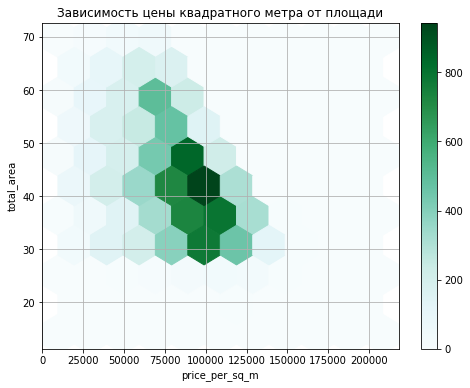

In [65]:
#цен много и квадратных метров тоже - поэтому строю такой график с распределением по "сотам"
data_filtered_iteration_2.query('last_price < 5000000 and total_area < 70').plot(x='price_per_sq_m', y='total_area', kind='hexbin', gridsize=10, figsize=(8, 6), sharex=False, grid=True, title='Зависимость цены квадратного метра от площади')

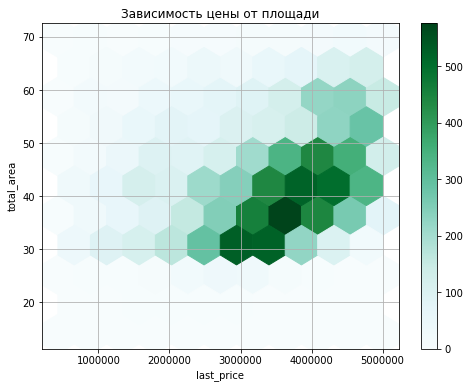

In [66]:
data_filtered_iteration_2.query('last_price < 5000000 and total_area < 70').plot(x='last_price', y='total_area', kind='hexbin', gridsize=10, figsize=(8, 6), sharex=False, grid=True, title='Зависимость цены от площади')

### Вывод:
Цена зависит от площади квартиры (коэффициент корреляции - 0.66).
Однако, этот вопрос стоит рассмотреть в двух плоскостях:
1. цена квартир с ростом площади ожидаемо увеличивается.
1. цена квадратного метра с ростом площади ожидаемо немного снижается.
Это характерно для бюджетные предложений. При этом самая дорогая цена квадратного метра у небольших квартир, хоть таких предложений и большинство.

#### Засисит ли цена от числа комнат.

In [67]:
data_filtered_iteration_2['last_price'].corr(data_filtered_iteration_2['rooms'])

0.3707689255780091

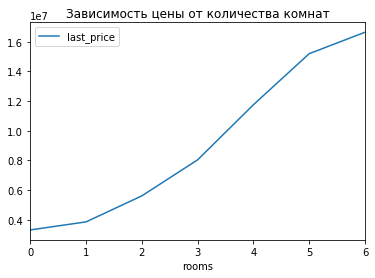

In [68]:
(data_filtered_iteration_2
                #.query('0 < last_price < 5000000 and total_area < 100')
                .pivot_table(index='rooms', values='last_price', aggfunc='mean')
                .plot(title='Зависимость цены от количества комнат')
)

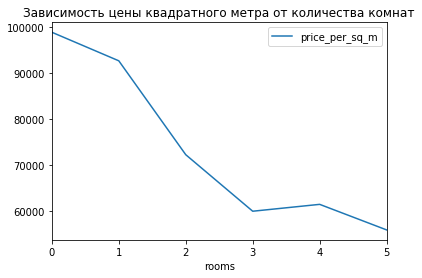

In [69]:
(data_filtered_iteration_2
                .query('0 < last_price < 5000000 and total_area < 100')
                .pivot_table(index='rooms', values='price_per_sq_m', aggfunc='mean')
                .plot(title='Зависимость цены квадратного метра от количества комнат')
)

In [70]:
data_filtered_iteration_2['last_price'].corr(data_filtered_iteration_2['price_per_sq_m'])

0.8073262203447754

#### Вывод:
Цена квартир опосредованно зависит от количества комнат, фактор площади оказывает большее влияние, поскольку количество комнат в данном случае - это следствие общей площади. Отмечая на вопрос: да, однозначно с ростом числа комнат растет и цена объекта. Верно также, что цена за квадратный метр больше всего в маленьких квартирах.

#### Зависит ли цена от этажа.

In [71]:
data_filtered_iteration_2['last_price'].corr(data_filtered_iteration_2['floor_group'])

0.04285629531871296

In [72]:
data_filtered_iteration_2['last_price'].corr(data_filtered_iteration_2['floor'])

0.049724292356102186

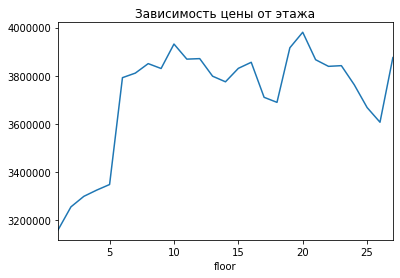

In [73]:
(data_filtered_iteration_2
                .query('0 < last_price < 5000000 and total_area < 200')
                .pivot_table(index='floor', values='last_price', aggfunc='mean')
                .plot(title='Зависимость цены от этажа', legend=False)
)

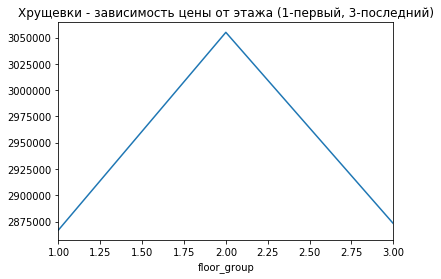

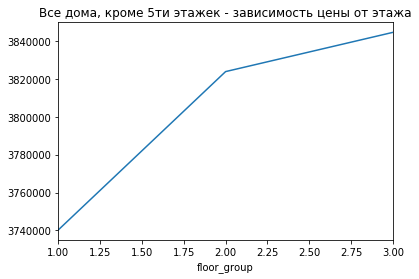

In [74]:
(data_filtered_iteration_2
                .query('0 < last_price < 5000000 and total_area < 100 and floors_total < 6')
                .pivot_table(index='floor_group', values='last_price', aggfunc='mean')
                .plot(title='Хрущевки - зависимость цены от этажа (1-первый, 3-последний)', legend=False)
)
(data_filtered_iteration_2
                .query('0 < last_price < 5000000 and total_area < 100 and floors_total > 6')
                .pivot_table(index='floor_group', values='last_price', aggfunc='mean')
                .plot(title='Все дома, кроме 5ти этажек - зависимость цены от этажа', legend = False)
)

#### Вывод:
1. Хоть коэффициенты корреляции и не большие, всего по 4% здесь нужно выделять несколько типов домов - Хрущевки, 10-этажки и все остальные.
1. В целом есть тенденция роста цен объекта с ростом этажа.
1. Но нужно обозначить, что цены на жилье на первых и последних этажах хрущевок одни из самых низких.

#### Зависит ли цена от удаленности от центра.

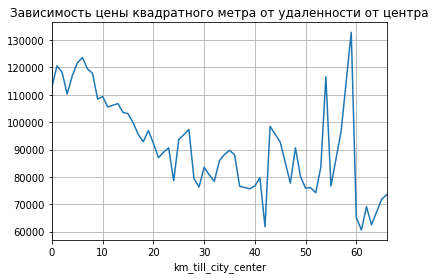

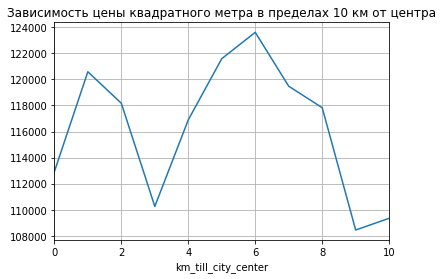

In [75]:
(data_filtered_iteration_2
                .query('last_price < 15000000')
                .pivot_table(index='km_till_city_center', values='price_per_sq_m', aggfunc='mean')
                .plot(title='Зависимость цены квадратного метра от удаленности от центра', legend = False, grid=True)
)

(data_filtered_iteration_2
                .query('last_price < 15000000 and km_till_city_center <= 10')
                .pivot_table(index='km_till_city_center', values='price_per_sq_m', aggfunc='mean')
                .plot(title='Зависимость цены квадратного метра в пределах 10 км от центра', legend = False, grid=True)
)


#### Вывод:

Цена квартир (и квадратного метра) совершенно точно зависит от удаленности от центра города. 
Прослеживается тенденция, что чем ближе  к центру - тем дороже. Впервые снижение цены происходит на удалении от центра примерно в 3 км, а после - в районе 9 км. Видимо 3км и 9 км - является точкой отсчета центра (в зависимости от размера города).
После 40 км от центра цена метра начинает расти - видимо это уже не квартиры, а загородные дома, поэтому и цена растет вплоть до удаления в 60 км - видимо дальше уже дачи.

#### Зависит ли цена от даты размещения.

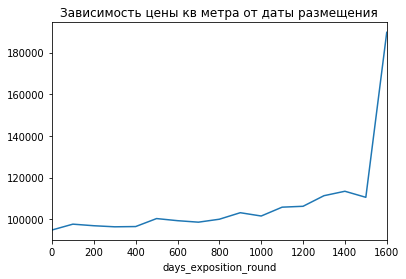

In [76]:
(data_filtered_iteration_2
                #.query('0 < last_price < 5000000 and total_area < 100')
                .pivot_table(index='days_exposition_round', values='price_per_sq_m', aggfunc='mean')
                .plot(title='Зависимость цены кв метра от даты размещения', legend = False)
)

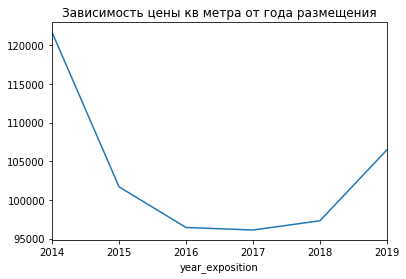

In [77]:
(data_filtered_iteration_2
                #.query('0 < last_price < 5000000 and total_area < 100')
                .pivot_table(index='year_exposition', values='price_per_sq_m', aggfunc='mean')
                .plot(title='Зависимость цены кв метра от года размещения', legend = False)
)

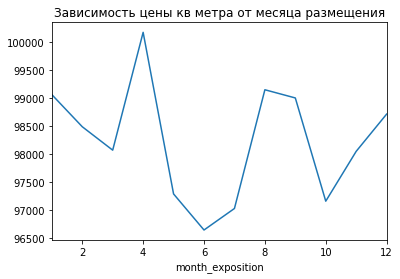

In [78]:
(data_filtered_iteration_2
                #.query('0 < last_price < 5000000 and total_area < 100')
                .pivot_table(index='month_exposition', values='price_per_sq_m', aggfunc='mean')
                .plot(title='Зависимость цены кв метра от месяца размещения', legend = False)
)

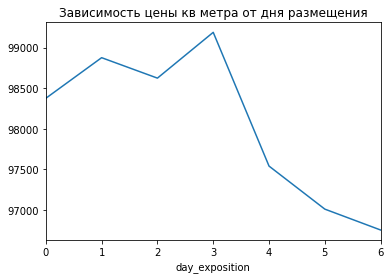

In [79]:
(data_filtered_iteration_2
                #.query('0 < last_price < 5000000 and total_area < 100')
                .pivot_table(index='day_exposition', values='price_per_sq_m', aggfunc='mean')
                .plot(title='Зависимость цены кв метра от дня размещения', legend = False)
)

#### Вывод:
Самые дорогие объекты, с самой высокой ценой квадратного метра выставляются до 1600 дней. В целом можно наблюдать зависимость, что чем больше цена квартиры, тем дольше она выставляется (и следственно дольше продается).
Кроме того:
1. ниже всего цена размещения например была с 2015 по 2018 годы - вероятно, что людям приходилось продавать свою недвижимость, раз они готовы были снижать цены.
1. самую высокую цену назначают за объекты выставляющиеся в апреле, а самую низкую - летом: июнь и июль.
1. и даже день недели оказывает влияние на цены квартир - в среднем самые низкие у выставленных с пятницы по воскресенье.

#### 10 Объектов с наибольшим числом объявлений:

Здесь "муриный" - это "Мурино", "парголовый" видимо "Парголово".

In [80]:
top_10_cities = data_filtered_iteration_2['locality_name_lematized'].value_counts().head(10)
print(top_10_cities)

санкт-петербург    14888
муриный              512
шушар                424
кудрово              422
всеволожск           382
пушкин               356
колпино              333
парголовый           319
гатчина              296
выборг               216
Name: locality_name_lematized, dtype: int64


In [81]:
data_filtered_iteration_2.query('locality_name_lematized in @ top_10_cities.index').pivot_table(index='locality_name_lematized', values='price_per_sq_m', aggfunc='mean').sort_values(by='price_per_sq_m', ascending=False).round(0)

,price_per_sq_m
locality_name_lematized,
санкт-петербург,113205.0
пушкин,103194.0
кудрово,94705.0
парголовый,90185.0
муриный,85293.0
шушар,78118.0
колпино,75238.0
гатчина,68582.0
всеволожск,68557.0


In [82]:
data_filtered_iteration_2.query('locality_name_lematized in @ top_10_cities.index').pivot_table(index='locality_name_lematized', values='last_price', aggfunc='mean').sort_values(by='last_price', ascending=False).round(0)

,last_price
locality_name_lematized,
санкт-петербург,7360442.0
пушкин,6181817.0
кудрово,4509838.0
парголовый,4494202.0
шушар,4153307.0
колпино,3869878.0
всеволожск,3835409.0
муриный,3825021.0
гатчина,3498883.0


#### Вывод:
Наибольшая цена квардратного метра в городе Санкт-Петербург, а в пригородах она существенно ниже. Самая низкая цена из топ-10 в городе Выборг.

#### Зависимость цены от удаленности от центра в г. Санкт-Петербург

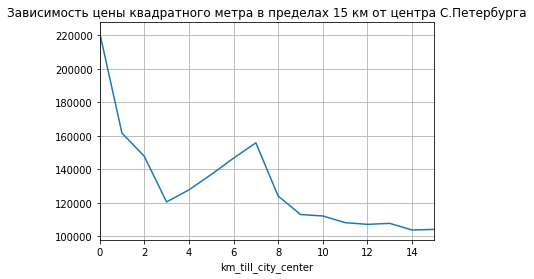

In [83]:
(data_filtered_iteration_2
                .query('locality_name_lematized == "санкт-петербург" and km_till_city_center <= 15')
                .pivot_table(index='km_till_city_center', values='price_per_sq_m', aggfunc='mean')
                .plot(title='Зависимость цены квадратного метра в пределах 15 км от центра С.Петербурга', legend = False, grid=True)
)

#### Вывод:
Радиус в 7 км от центра С.Петербурга можно считать центром, так как средняя цена квартир от 0 до 7 км имеет не убывающий участок (на графике). После 7км снова происходит резкое снижение цены квадратного метра и она уже не дальше не растет.

#### Выделите сегмент квартир в центре и как анализ по этому сегменту соотносится с остальным городом.

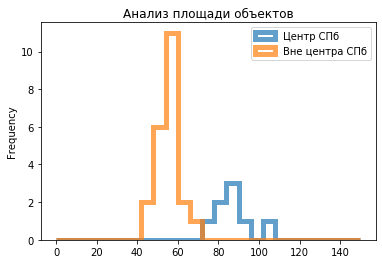

In [84]:
#сравниваю квартиры в центре СПб и за пределами центра по площади
#в `data_filtered` уже стоит ограничение на площадь в 200 кв метров и количество комнта - не больше 6ти

mean_center_area_SPb1 = (data_filtered
                                    .query('locality_name_lematized == "санкт-петербург" and km_till_city_center <= 7')
                                    .pivot_table(index="km_till_city_center", values="total_area", aggfunc="mean")
                       )
mean_non_center_area_SPb1 = (data_filtered
                                    .query('locality_name_lematized == "санкт-петербург" and km_till_city_center > 7')
                                    .pivot_table(index="km_till_city_center", values="total_area", aggfunc="mean")
                       )
ax = mean_center_area_SPb1.plot(kind='hist', y='total_area', histtype='step', range=(0, 150), bins=25, linewidth=5, alpha=0.7, label='Центр СПб', title='Анализ площади объектов')
mean_non_center_area_SPb1.plot(kind='hist', y='total_area', histtype='step', range=(0, 150), bins=25, linewidth=5, alpha=0.7, label='Вне центра СПб', ax = ax)

В центре СПб __средняя площадь__ квартир выше и составляет 70-90 квадратных метров, против 40-70 за пределами центра.

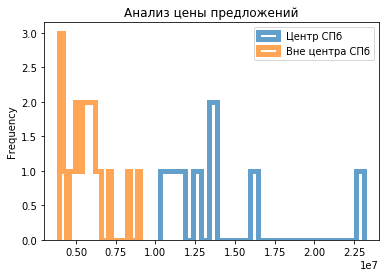

In [85]:
mean_center_area_SPb2 = (data_filtered
                                    .query('locality_name_lematized == "санкт-петербург" and km_till_city_center <= 7')
                                    .pivot_table(index="km_till_city_center", values="last_price", aggfunc="mean")
                       )
mean_non_center_area_SPb2 = (data_filtered
                                    .query('locality_name_lematized == "санкт-петербург" and km_till_city_center > 7')
                                    .pivot_table(index="km_till_city_center", values="last_price", aggfunc="mean")
                       )
ax = mean_center_area_SPb2.plot(kind='hist', y='last_price', histtype='step', bins=25, linewidth=5, alpha=0.7, label='Центр СПб', title = 'Анализ цены предложений')
mean_non_center_area_SPb2.plot(kind='hist', y='last_price', histtype='step', bins=25, linewidth=5, alpha=0.7, label='Вне центра СПб', ax = ax)

__Средняя цена__ квартир выше в Центре СПб, чем вне центра. Также заметно, что разброс цен в центре шире, чем вне центра.

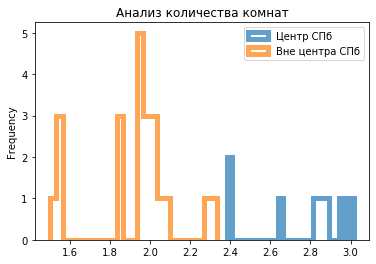

In [86]:
mean_center_area_SPb3 = (data_filtered
                                    .query('locality_name_lematized == "санкт-петербург" and km_till_city_center <= 7')
                                    .pivot_table(index="km_till_city_center", values="rooms", aggfunc="mean")
                       )
mean_non_center_area_SPb3 = (data_filtered
                                    .query('locality_name_lematized == "санкт-петербург" and km_till_city_center > 7')
                                    .pivot_table(index="km_till_city_center", values="rooms", aggfunc="mean")
                       )
ax = mean_center_area_SPb3.plot(kind='hist', y='rooms', histtype='step', bins=25, linewidth=5, alpha=0.7, label='Центр СПб', title='Анализ количества комнат')
mean_non_center_area_SPb3.plot(kind='hist', y='rooms', histtype='step', bins=25, linewidth=5, alpha=0.7, label='Вне центра СПб', ax = ax)

Предлагаемое в центре жилье обычно содержит 2-3 комнаты, в то время как вне центра чаще всего 2 комнаты.

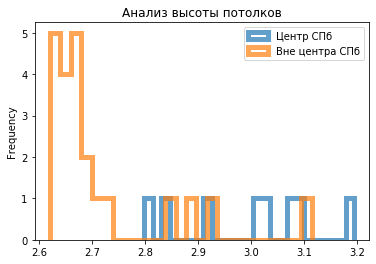

In [87]:
mean_center_area_SPb4 = (data_filtered
                                    .query('locality_name_lematized == "санкт-петербург" and km_till_city_center <= 7')
                                    .pivot_table(index="km_till_city_center", values="ceiling_height", aggfunc="mean")
                       )
mean_non_center_area_SPb4 = (data_filtered
                                    .query('locality_name_lematized == "санкт-петербург" and km_till_city_center > 7')
                                    .pivot_table(index="km_till_city_center", values="ceiling_height", aggfunc="mean")
                       )
ax = mean_center_area_SPb4.plot(kind='hist', y='ceiling_height', histtype='step', bins=25, linewidth=5, alpha=0.7, label='Центр СПб', title='Анализ высоты потолков')
mean_non_center_area_SPb4.plot(kind='hist', y='ceiling_height', histtype='step', bins=25, linewidth=5, alpha=0.7, label='Вне центра СПб', ax = ax)

И вполне ожидаемо, что жилье вне центра имеет среднюю высоту потолков порядка 2.6-2.75 метров, в то время как в центре жилье не типовое и высота потолка варьируется в широких пределах от 2.8 до 3.2 метра.

#### Сравните корреляцию основных факторов с ценой по всем предложениям и объявлениям в вашей выборке. Центр и не центр.

In [88]:
#сделаем 2 среза - один в центре СПб, другой вне центра и по всем значимым характеристикам оценим изменения в корреляции.
data_filtered_iteration_2_SPb_center = (data_filtered_iteration_2
                                            .query('locality_name_lematized == "санкт-петербург" and km_till_city_center <= 7 and last_price <= 15000000')
                                            .loc[:,
                                              [
                                              'price_per_sq_m',
                                              'total_area',
                                              'rooms',
                                              'ceiling_height',
                                              'floor',
                                              'floor_group',
                                              'km_till_city_center',    
                                              'days_exposition'
                                               ]]                                                   
                                                )

data_filtered_iteration_2_SPb_non_center = (data_filtered_iteration_2
                                            .query('locality_name_lematized == "санкт-петербург" and km_till_city_center > 7  and last_price <= 15000000')
                                            .loc[:,
                                              [
                                              'price_per_sq_m',
                                              'total_area',
                                              'rooms',
                                              'ceiling_height',
                                              'floor',
                                              'floor_group',
                                              'km_till_city_center',    
                                              'days_exposition'
                                               ]]                                                   
                                                )


In [89]:
len(data_filtered_iteration_2_SPb_center) #сегменты более 1000 как и запрашивалось в условии

2608

In [90]:
len(data_filtered_iteration_2_SPb_non_center)  #сегменты более 1000 как и запрашивалось в условии

11319

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff7b8ba6190>,
      dtype=object)

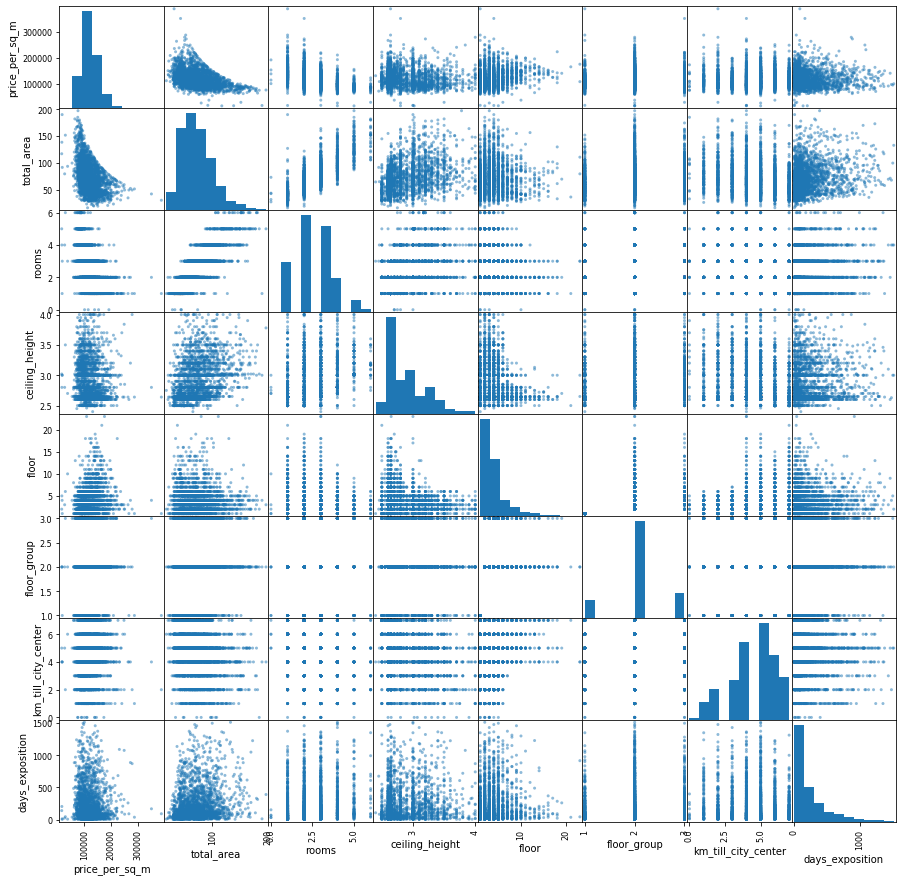

In [91]:
#корреляции в центре - графики конечно мелкие и трудно читаемые, но другого наглядного способа я не придумал, прости меня уважаемый ревьюер
pd.plotting.scatter_matrix(data_filtered_iteration_2_SPb_center, figsize=(15, 15))

<div class="alert alert-block alert-success">
Чувствую себя к в "Матрице" :)  При желании можно конечно все разглядеть
</div>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff774e0db10>,
      dtype=object)

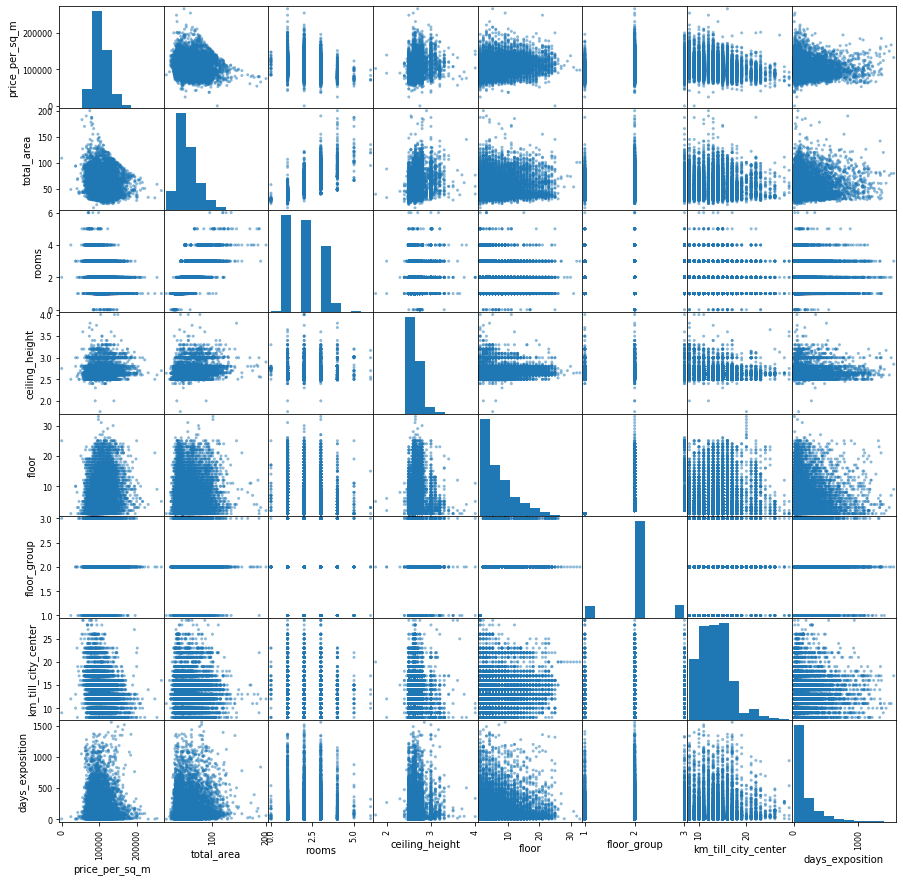

In [92]:
#корреляции не в центре
pd.plotting.scatter_matrix(data_filtered_iteration_2_SPb_non_center, figsize=(15, 15))

#### Вывод:
В целом можно отметить, что цена квадратного метра в центре и не в центре зависит от одинаковых причин и изменяются схожим образом. Но есть и свои особенности, например:
1. Начнем с того, что бюджетных предложений в центре меньше - это видно на гистограммах;
1. С ростом площади цена квадратного метра снижается - но за пределами центра в основном продаются типовые объекты 1-2 комнаты со более-менее стандартной ценой, а в центре больше выбора как маленьких так и больших квартир;
1. Чем больше комнат тем меньше цена за квадратный метр - это верно и для квартир в центре и за его пределами;
1. В центре больше предложений с потолками разной высоты, за пределами центра почти все жильей с потолками выше 2.3 метра. К величине полотка около 3.5 метров цена квадратного метра немного снижается в центре, а потом растет. Видимо это какой-то тип домов.
1. Чем выше этаже тем выше в среднем цена квадратного метра, также верно и для центра и для квартир вне центра. Но предложений на промежуточных этажах гораздо больше в целом. Видимо последние этаже - это своего-рода пентхаузы поэтому там и цена квадратного метра не так "скачет".
1. Для кватрир дальше чем 7км от центра каждый дополнительный км удаленности - снижает цену жилья, а для жилья в пределах этих 7ми километров цена в целом стабильная. Единственно в 1км зоне предложений почти нет.
1. Чем дольше жилье выставляется тем меньше становится его цена - верно для центра и не центра.

#### Подберите наиболее характерные параметры для апартаментов, студий и квартир свободной планировки.

In [93]:
data_filtered_iteration_2_studios_open = data_filtered_iteration_2.query('studio == True or open_plan == True or is_apartment == True')

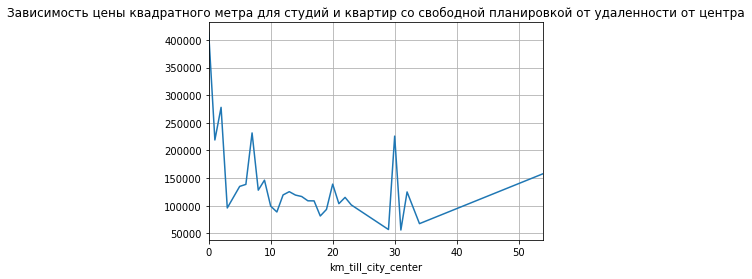

In [94]:
(data_filtered_iteration_2_studios_open
                .pivot_table(index='km_till_city_center', values='price_per_sq_m', aggfunc='mean')
                .plot(title='Зависимость цены квадратного метра для студий и квартир со свободной планировкой от удаленности от центра', legend = False, grid=True)
)

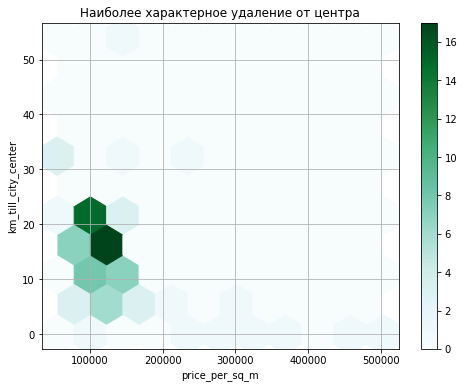

In [95]:
data_filtered_iteration_2_studios_open.plot(x='price_per_sq_m', y='km_till_city_center', kind='hexbin', gridsize=10, figsize=(8, 6), sharex=False, grid=True, title='Наиболее характерное удаление от центра')

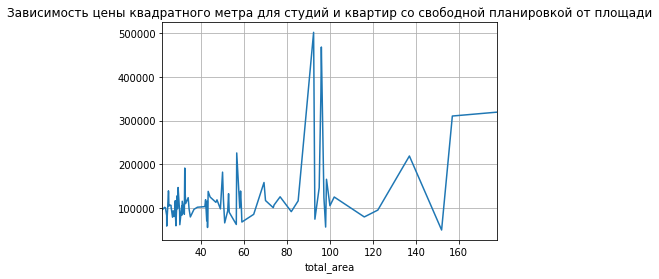

In [96]:
(data_filtered_iteration_2_studios_open
                .pivot_table(index='total_area', values='price_per_sq_m', aggfunc='mean')
                .plot(title='Зависимость цены квадратного метра для студий и квартир со свободной планировкой от площади', legend = False, grid=True)
)

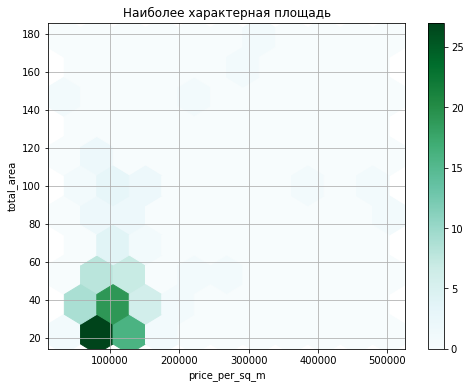

In [97]:
data_filtered_iteration_2_studios_open.plot(x='price_per_sq_m', y='total_area', kind='hexbin', gridsize=10, figsize=(8, 6), sharex=False, grid=True, title='Наиболее характерная площадь')

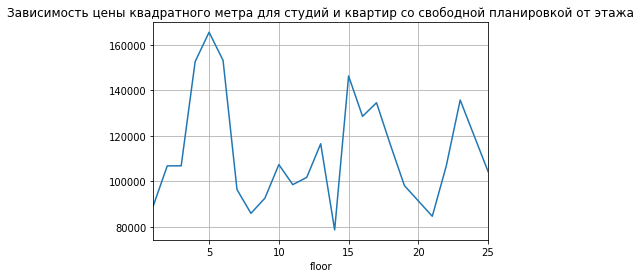

In [98]:
(data_filtered_iteration_2_studios_open
                .pivot_table(index='floor', values='price_per_sq_m', aggfunc='mean')
                .plot(title='Зависимость цены квадратного метра для студий и квартир со свободной планировкой от этажа', legend = False, grid=True)
)

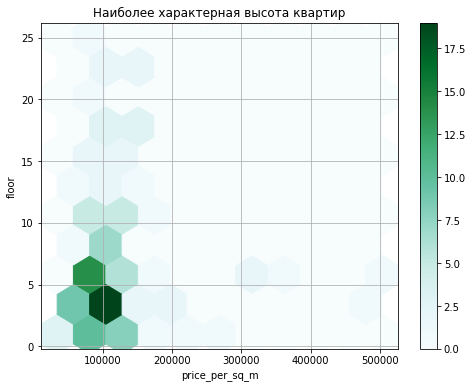

In [99]:
data_filtered_iteration_2_studios_open.plot(x='price_per_sq_m', y='floor', kind='hexbin', gridsize=10, figsize=(8, 6), sharex=False, grid=True, title='Наиболее характерная высота квартир')

### Вывод:
Для квартир с открытой планировкой и студий в целом подтвердаются те же выводы, что и для всех остальных квартир, но есть исключения:
1. близость к центру очень сильной влияет на цену недвижимости: ближе-дороже;
1. заметен сильный рост цены квадратного метра в том случае если у квартиры со свободной планировкой большая площадь. А в случае обычных квартир с ростом площади и числа комнат цена квадратного метра снижалась;
1. этаж также влияет на цену этой группы квартри - в целом чем выше, тем дороже, но цена определенных объектов высотой 21 и 25 метров выбивается из этой последовательности (у них цена квадратного метра близка к минимумам).
1. при всем при этом наиболее типичными объектами (аппартаменты/свободная планировка/студии) являются объекты с площадью от 20 до 30 квадратных метров, 15-20 км от центра и небольших домах до 5ти этажей.

### Шаг 5. Общий вывод

Мы проанализировали данные продаж квартир в Санкт-Петербурге и окрестностях.
Начали с предобработки данных:
- заменили NaN в колонках с указанием высоты потолка, количество этажей в доме и площади кухонь (и жилой площади);
- те 49 объектов где не был указан город пришлось удалить;
- дубликатов в процессе анализа выявлено не было;
- была проведена лемматизация названий городов, чтобы привести к единому виду;
- и в самом начале выявлены некоторые выбросы - например квартиры с площадью более 200 метров (комнат больше 6). Усеченный сет данных назвали `data_filtered`

После этого мы приступили к анализу данных:
- построили графики "ящик с усами" - чтобы оценить какие еще выбросы остались после первой фильтрации. Усеченный сет назвали `data_filtered_itereation2`
- анализировали данные в целом по всему региону, с выделением отдельных данных СПб и отдельных данных квартир свободной планировки (включая студии и аппартаменты).

Наш анализ показал:
- наибольшее влияние на цену квартир (и цену квадратного метра соответственно) оказывает площадь объекта (и другие производные площади: жилая площадь, количество комнат) - коэффициент корреляции Пирсона 0.7;
- другие показатели не обладают таким высоким коэффициентом корреляции если смотреть на широкой выборке;
- цена квадратного метра квартиры снижается с ростом площади объекта, однако это не верно для квартир свободной планировки;
- средняя цена в Санкт-Петербурге на ~10% выше средней цены в следующем по цене городе;
- выяснилось, что центром с точки зрения влияния на цену квартир является удаленность примерно в 7 км. В СПб в частности при пересечении этой границы средняя цена квадратного метра начинает снижаться;
- нужно отметить, что жилье в центре СПб отличается гороздо более широким многообразием (площадь, высота потолков, количество комнат), в отличие от окраин;
- дорогие объекты также продаются достаточно долго и есть прямая зависимость между днем, месяцем и годом когда выставлялся объект. Например в 2015-2018 средняя цена квадратного метра была минимальной.
- объекты на первых и последних этажах дешевле чем объекты в центре дома, особенно верно это для 5ти этажек (видимо Хрущевок);
- типичной квартирой свободной планировки/студии/аппартаменты является небольшая квартира 20-30 метров в зданиях до 5ти этажей в 15-20 км от центра.